[MainProcess/INFO] pool started with 12 workers
100%|████████████████████████████████████████| 200/200 [00:31<00:00,  6.35it/s]
[MainProcess/INFO] optimization completed, found 8 solutions
[MainProcess/INFO] terminating pool


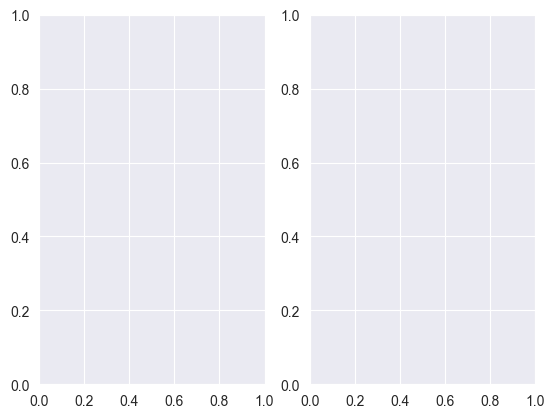

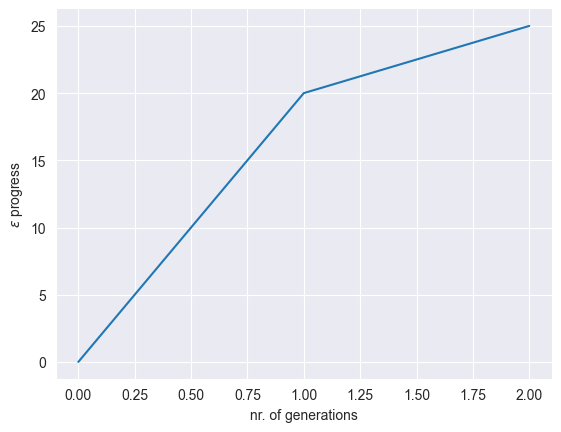

In [12]:
from ema_workbench import (
    Model,
    MultiprocessingEvaluator,
    ScalarOutcome,
    IntegerParameter,
    optimize,
    Scenario,
)
from ema_workbench.em_framework.optimization import EpsilonProgress
from ema_workbench.util import ema_logging

from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import seaborn as sns


if __name__ == "__main__":
    ema_logging.log_to_stderr(ema_logging.INFO)

    model, steps = get_model_for_problem_formulation(2)

    reference_values = {
        "Bmax": 175,
        "Brate": 1.5,
        "pfail": 0.5,
        "discount rate 0": 3.5,
        "discount rate 1": 3.5,
        "discount rate 2": 3.5,
        "ID flood wave shape": 4,
    }
    scen1 = {}

    for key in model.uncertainties:
        name_split = key.name.split("_")

        if len(name_split) == 1:
            scen1.update({key.name: reference_values[key.name]})

        else:
            scen1.update({key.name: reference_values[name_split[1]]})

    ref_scenario = Scenario("reference", **scen1)

    convergence_metrics = [EpsilonProgress()]

    espilon = [1e3] * len(model.outcomes)

    nfe = 200  # proof of principle only, way to low for actual use

    with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(
            nfe=nfe,
            searchover="levers",
            epsilons=espilon,
            convergence=convergence_metrics,
            reference=ref_scenario,
        )

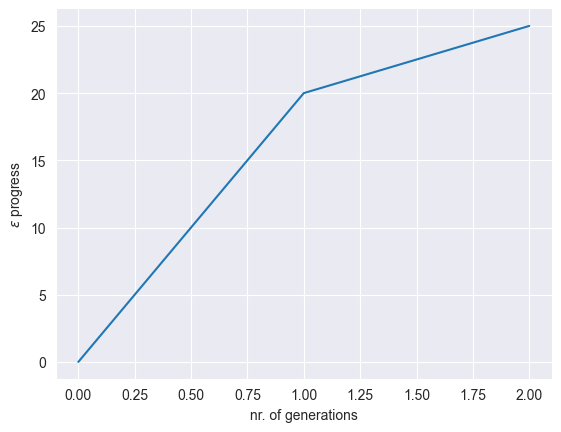

In [13]:
fig, ax1 = plt.subplots(ncols=1)
ax1.plot(convergence.epsilon_progress)
ax1.set_xlabel("nr. of generations")
ax1.set_ylabel(r"$\epsilon$ progress")
sns.despine()

In [14]:
results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1,1,1,1,0,1,0,1,0,1,...,0,5,3,1,5,0.000000e+00,4.565983e+08,1.218600e+09,0.000000,0.000000
1,0,1,1,0,0,1,0,1,0,0,...,8,2,3,0,4,0.000000e+00,4.760101e+08,6.601000e+08,0.000000,0.000000
2,0,1,1,1,0,1,1,1,1,0,...,2,7,6,4,3,0.000000e+00,4.744109e+08,1.074200e+09,0.000000,0.000000
3,0,0,1,1,0,1,1,1,1,1,...,1,8,6,0,3,0.000000e+00,4.386121e+08,1.623000e+09,0.000000,0.000000
4,1,1,1,1,0,0,1,0,0,1,...,1,4,1,6,7,3.591758e+06,4.719417e+08,1.135700e+09,203.544147,0.000573
5,1,0,0,0,0,0,0,1,1,1,...,7,4,2,2,6,1.040002e+06,7.145520e+08,2.672000e+08,33.375768,0.000437
6,1,0,0,0,0,0,1,1,1,1,...,8,0,5,3,3,0.000000e+00,5.666566e+08,2.979000e+08,0.000000,0.000000
7,0,0,0,1,0,0,1,0,1,0,...,7,7,4,1,7,0.000000e+00,5.360349e+08,5.353000e+08,0.000000,0.000000
